# SPR Data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
color = sns.color_palette()

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


**Dataset Size:**

First let us check the number of rows in train and test file :
- Number of rows in train :  13647309
- Number of rows in test :  929615

**Dataset columns:**
  
  
Main columns :   

- fecha_dato 	The table is partitioned for this column
- ncodpers 	Customer code
- ind_empleado 	Employee index: A active, B ex employed, F filial, N not employee, P pasive
- pais_residencia 	Customer's Country residence
- sexo 	Customer's sex
- age 	Age
- fecha_alta 	The date in which the customer became as the first holder of a contract in the bank
- ind_nuevo 	New customer Index. 1 if the customer registered in the last 6 months.
- antiguedad 	Customer seniority (in months)
- indrel 	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
- ult_fec_cli_1t 	Last date as primary customer (if he isn't at the end of the month)
- indrel_1mes 	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
- tiprel_1mes 	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
- indresi 	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
- indext 	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
- conyuemp 	Spouse index. 1 if the customer is spouse of an employee
- canal_entrada 	channel used by the customer to join
- indfall 	Deceased index. N/S
- tipodom 	Addres type. 1, primary address
- cod_prov 	Province code (customer's address)
- nomprov 	Province name
- ind_actividad_cliente 	Activity index (1, active customer; 0, inactive customer)
- renta 	Gross income of the household
- segmento 	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated    
    
    
target columns : 
    
- ind_ahor_fin_ult1 	Saving Account
- ind_aval_fin_ult1 	Guarantees
- ind_cco_fin_ult1 	Current Accounts
- ind_cder_fin_ult1 	Derivada Account
- ind_cno_fin_ult1 	Payroll Account
- ind_ctju_fin_ult1 	Junior Account
- ind_ctma_fin_ult1 	Más particular Account
- ind_ctop_fin_ult1 	particular Account
- ind_ctpp_fin_ult1 	particular Plus Account
- ind_deco_fin_ult1 	Short-term deposits
- ind_deme_fin_ult1 	Medium-term deposits
- ind_dela_fin_ult1 	Long-term deposits
- ind_ecue_fin_ult1 	e-account
- ind_fond_fin_ult1 	Funds
- ind_hip_fin_ult1 	Mortgage
- ind_plan_fin_ult1 	Pensions
- ind_pres_fin_ult1 	Loans
- ind_reca_fin_ult1 	Taxes
- ind_tjcr_fin_ult1 	Credit Card
- ind_valo_fin_ult1 	Securities
- ind_viv_fin_ult1 	Home Account
- ind_nomina_ult1 	Payroll
- ind_nom_pens_ult1 	Pensions
- ind_recibo_ult1 	Direct Debit    
    

In [2]:
TARGET_LABELS = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

## Data stats: data per month representations

In [3]:
data_path = "data/"
train = pd.read_csv(data_path+"train_ver2.csv", usecols=['fecha_dato', 'ncodpers'], parse_dates=['fecha_dato'])

In [4]:
gb = train.groupby('fecha_dato')
data_count_per_month = gb.agg('size')

In [5]:
month_start_end_row_indices = {}
for key, group_value in gb:
    month_start_end_row_indices[key] = [group_value.index[0], group_value.index[-1]]
    
#month_start_end_row_indices    

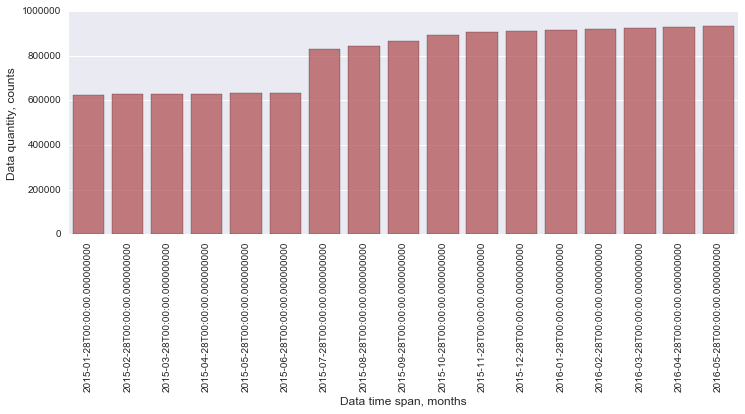

In [6]:
plt.figure(figsize=(12,4))

#values = np.log((data_count_per_month.values - np.min(data_count_per_month.values)) + 1)
values = data_count_per_month.values

sns.barplot(data_count_per_month.index, values, alpha=0.8, color=color[2])
plt.ylabel('Data quantity, counts', fontsize=12)
plt.xlabel('Data time span, months', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [7]:
del train
del gb

### Analyse a month

Read a month

In [8]:
month_key=pd.Timestamp('2015-01-28 00:00:00')
skiprows = month_start_end_row_indices[month_key][0]
nrows = month_start_end_row_indices[month_key][1] - skiprows + 1
train_month = pd.read_csv(data_path+"train_ver2.csv", skiprows=range(1, skiprows+1), nrows=nrows)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
month_full_stats = train_month.describe()
month_full_stats

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,6.254570e+05,618504.000000,618504.000000,618504.000000,618504.0,614826.000000,618504.000000,5.138790e+05,625457.000000,625457.000000,...,625457.000000,625457.000000,625457.000000,625457.000000,625457.000000,625457.000000,625457.000000,622346.000000,622346.000000,625457.000000
mean,7.763354e+05,0.000296,1.120895,1.000095,1.0,26.669173,0.537777,1.345990e+05,0.000141,0.000030,...,0.008005,0.011879,0.003756,0.061216,0.056939,0.032397,0.005171,0.062658,0.069625,0.152850
std,4.055675e+05,0.017198,3.439928,0.013753,0.0,12.676776,0.498571,2.257587e+05,0.011861,0.005512,...,0.089114,0.108343,0.061168,0.239726,0.231727,0.177053,0.071721,0.242347,0.254515,0.359843
min,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.137720e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,8.739230e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,1.133417e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
max,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_month["fecha_dato"] = pd.to_datetime(train_month["fecha_dato"],format="%Y-%m-%d")
train_month["fecha_alta"] = pd.to_datetime(train_month["fecha_alta"],format="%Y-%m-%d")
train_month["age"] = pd.to_numeric(train_month["age"], errors="coerce")

In [11]:
train_month.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [12]:
string_data = train_month.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' nan 'A' 'B' 'F' 'S']

Unique values for pais_residencia:
['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN' 'TW'
 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL' 'RU' 'GT'
 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA' 'CI' 'QA' 'LU'
 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR' 'AO' 'CU' 'GQ' 'EG'
 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK' 'TN' 'TG' 'KR' 'GH' 'RS'
 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN' 'GW' 'OM' 'CG' 'LV' 'LT' 'ML'
 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD' 'BZ']

Unique values for sexo:
['H' 'V' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-02' '2015-07-23' '2015-07-06' '2015-07-30' '2015-07-20'
 '2015-07-08' '2015-07-22' '2015-07-17' '2015-07-09' '2015-07-03'
 '2015-07-29' '2015-07-13' '2015-07-21' '2015-07-27' '2015-07-14'
 '2015-07-01' '2015-07-24' '2015-07-15' '2015-07-16'

### Data Cleaning

In [13]:
df = train_month

There are some 'unknown' users:

In [14]:
print np.sum(df['sexo'].isnull()), np.sum(df['pais_residencia'].isnull()), np.sum(df['ind_empleado'].isnull()), np.sum(df['age'].isnull()), np.sum(df['fecha_alta'].isnull())


6955 6953 6953 6953 6953


In [15]:
unknown_users = df['sexo'].isnull() & df['age'].isnull() & df['ind_empleado'].isnull() & df['fecha_alta'].isnull() & df['pais_residencia'].isnull()

In [16]:
np.sum(unknown_users)

6953

In [17]:
df[unknown_users].tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
625112,2015-01-28,538710,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
625150,2015-01-28,538809,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
625268,2015-01-28,537502,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
625307,2015-01-28,537568,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
625374,2015-01-28,538217,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


In [18]:
df[unknown_users][TARGET_LABELS].tail()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
625112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,NaN,NaN,0
625150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,NaN,NaN,0
625268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
625307,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
625374,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


**Remove these users** !

In [19]:
df.drop(df[unknown_users].index, inplace=True)

In [20]:
unknown_users = df['sexo'].isnull() & df['age'].isnull() & df['ind_empleado'].isnull() & df['fecha_alta'].isnull() & df['pais_residencia'].isnull()
np.sum(unknown_users)

0

In [21]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
nomprov                   True
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

Start with gender -> replace nan with UNKNOWN

In [22]:
df['sexo'].unique()

array(['H', 'V', nan], dtype=object)

In [23]:
df.loc[df['sexo'].isnull(),'sexo'] = "UNKNOWN"

In [24]:
df['sexo'].unique()

array(['H', 'V', 'UNKNOWN'], dtype=object)

In [25]:
df['sexo'].value_counts()

V          339272
H          279230
UNKNOWN         2
Name: sexo, dtype: int64

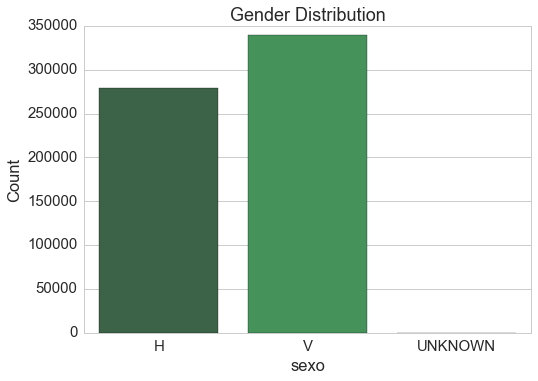

In [26]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.countplot(x="sexo", 
                  data=df, 
                  palette="Greens_d");
    sns.plt.title("Gender Distribution")
    plt.ylabel("Count")

Continue with age -> replace nan with ...

In [27]:
df['age'].unique()

array([  35.,   23.,   22.,   24.,   65.,   28.,   25.,   26.,   53.,
         27.,   32.,   37.,   31.,   39.,   63.,   33.,   55.,   42.,
         58.,   38.,   50.,   30.,   45.,   44.,   36.,   29.,   60.,
         57.,   67.,   47.,   34.,   48.,   46.,   54.,   84.,   15.,
         12.,    8.,    6.,   83.,   40.,   77.,   69.,   52.,   59.,
         43.,   10.,    9.,   49.,   41.,   51.,   78.,   16.,   11.,
         73.,   62.,   66.,   17.,   68.,   82.,   95.,   96.,   56.,
         61.,   79.,   72.,   14.,   19.,   13.,   86.,   64.,   20.,
         89.,   71.,    7.,   70.,   74.,   21.,   18.,   75.,    4.,
         80.,   81.,    5.,   76.,   92.,   93.,   85.,   91.,   87.,
         90.,   94.,   99.,   98.,   88.,   97.,  100.,  101.,  106.,
        103.,    3.,    2.,  102.,  104.,  111.,  107.,  109.,  105.,
        112.,  115.,  110.,  116.,  108.,  113.])

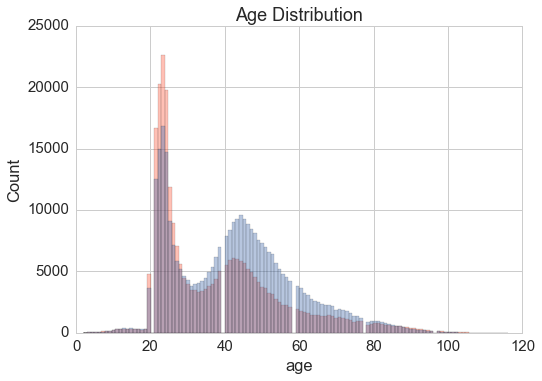

In [28]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df[df['sexo'] == "H"]["age"].dropna(),
                 bins=120,
                 kde=False,
                 color="tomato")
    sns.distplot(df[df['sexo'] == "V"]["age"].dropna(),
                 bins=120,
                 kde=False)
    sns.distplot(df[df['sexo'] == "UNKNOWN"]["age"].dropna(),
                 bins=120,
                 kde=False,
                 color="green")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [29]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 90,"age"] = df.loc[(df.age >= 30) & (df.age <= 90),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

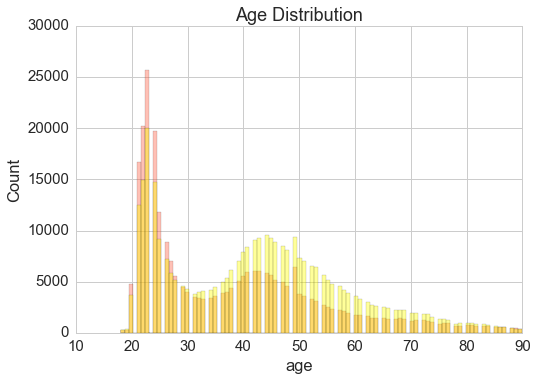

In [30]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df[df['sexo'] == "H"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color="tomato")
    sns.distplot(df[df['sexo'] == "V"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color='yellow')
    sns.distplot(df[df['sexo'] == "UNKNOWN"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color="green")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

Next `ind_empleado` : nan -> UNKNOWN

In [31]:
df['ind_empleado'].unique()

array(['N', 'A', 'B', 'F', 'S'], dtype=object)

In [32]:
df['ind_empleado'].fillna("UNKNOWN",inplace=True)

In [33]:
df['ind_empleado'].unique()

array(['N', 'A', 'B', 'F', 'S'], dtype=object)

In [34]:
df['ind_empleado'].value_counts()

N    618024
B       194
A       144
F       141
S         1
Name: ind_empleado, dtype: int64

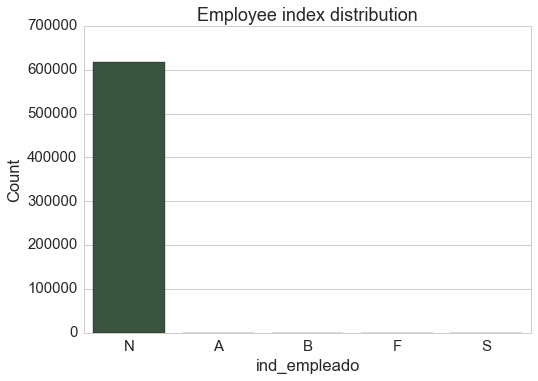

In [35]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.set_style("whitegrid")
    sns.countplot(x="ind_empleado", 
                  data=df, 
                  palette="Greens_d");
    sns.plt.title("Employee index distribution")
    plt.ylabel("Count")

Next `pais_residencia` : nan -> UNKNOWN

In [36]:
df['pais_residencia'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT',
       'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET', 'CM',
       'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE', 'SG',
       'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK', 'UY',
       'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR', 'GH',
       'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN', 'GW',
       'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF', 'GM',
       'KZ', 'CD', 'BZ'], dtype=object)

In [37]:
df['pais_residencia'].fillna('UNKNOWN', inplace=True)

In [38]:
df['pais_residencia'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT',
       'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET', 'CM',
       'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE', 'SG',
       'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK', 'UY',
       'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR', 'GH',
       'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN', 'GW',
       'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF', 'GM',
       'KZ', 'CD', 'BZ'], dtype=object)

In [39]:
df['pais_residencia'].value_counts()

ES    614825
FR       288
AR       275
DE       257
GB       254
CO       201
US       196
RO       168
IT       160
MX       143
BR       132
VE       130
EC       125
CH       112
BO        83
BE        83
PY        79
PT        77
CL        56
PE        50
RU        44
CU        44
NL        43
PL        32
CN        32
SE        32
UY        30
UA        29
AT        28
BG        28
       ...  
TW         2
GW         2
VN         2
ET         2
MZ         2
EE         2
BA         2
LT         2
MM         1
LY         1
ML         1
LV         1
KZ         1
OM         1
GE         1
KH         1
IS         1
HU         1
GH         1
GI         1
GM         1
CD         1
SL         1
CF         1
BZ         1
KW         1
AL         1
TG         1
TN         1
LB         1
Name: pais_residencia, dtype: int64

Next `fecha_alta` : 

In [40]:
np.sum(df['fecha_alta'].isnull())

0

In [41]:
## something in the middle of the pack
# dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
# median_date = int(np.median(dates.index.values))
# df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
# df["fecha_alta"].describe()

#### Display number of customers joined per year/month 

In [42]:
to_yearmonth = lambda x: int(100 * x.year + x.month)
yearmonth = df['fecha_alta'].apply(to_yearmonth)

('Minimum value of fecha_alta : ', 199501)
('Maximum value of fecha_alta : ', 201501)


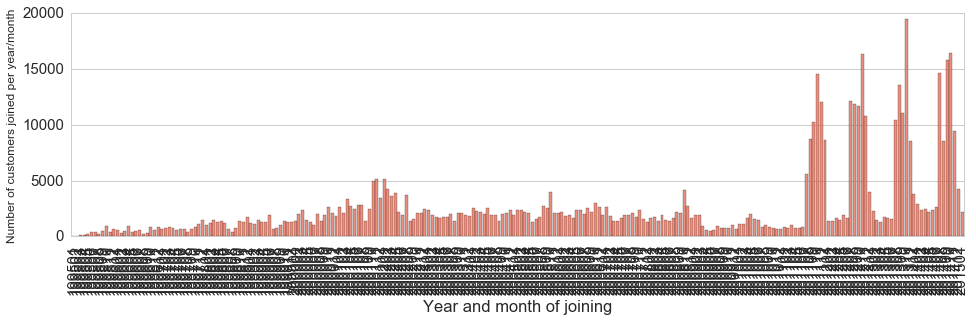

In [43]:
yearmonth_counts = yearmonth.value_counts()
print("Minimum value of fecha_alta : ", min(yearmonth_counts.index))
print("Maximum value of fecha_alta : ", max(yearmonth_counts.index))

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.barplot(yearmonth_counts.index, yearmonth_counts.values, 
                  alpha=0.8, 
                  color='tomato');
    plt.xlabel("Year and month of joining")
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of customers joined per year/month', fontsize=12)

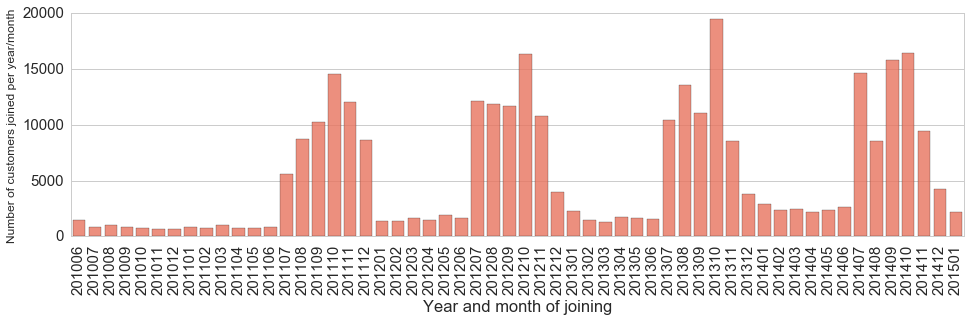

In [44]:
zoom_yearmonth_counts = yearmonth_counts.sort_index()
zoom_yearmonth_counts = zoom_yearmonth_counts[185:]

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.barplot(zoom_yearmonth_counts.index, zoom_yearmonth_counts.values, 
                  alpha=0.8, 
                  color='tomato');
    plt.xlabel("Year and month of joining")
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of customers joined per year/month', fontsize=12)

Next `ult_fec_cli_1t` (Last date as primary customer (if he isn't at the end of the month)) : nan -> ?

In [45]:
print np.sum(df['ult_fec_cli_1t'].isnull()), df['ult_fec_cli_1t'].shape

617741 (618504,)


In [46]:
df['ult_fec_cli_1t'].unique()

array([nan, '2015-07-02', '2015-07-23', '2015-07-06', '2015-07-30',
       '2015-07-20', '2015-07-08', '2015-07-22', '2015-07-17',
       '2015-07-09', '2015-07-03', '2015-07-29', '2015-07-13',
       '2015-07-21', '2015-07-27', '2015-07-14', '2015-07-01',
       '2015-07-24', '2015-07-15', '2015-07-16', '2015-07-28',
       '2015-07-07', '2015-07-10'], dtype=object)

In [ ]:
train_month['logrenta'] = np.log(train_month['renta'] + 1)

Apply PCA to reduce the number of entries

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10000)

In [ ]:
train_month_t = train_month.transpose()
reduced_train_month_t = pca.fit_transform(train_month_t)

In [ ]:
unique_ids   = pd.Series(train_month["ncodpers"].unique())
limit_people = 50000
unique_id    = unique_ids.sample(n=limit_people)
reduced_train_month = train_month[train_month.ncodpers.isin(unique_id)]
month_reduced_stats = reduced_train_month.describe()
month_reduced_stats

In [ ]:
res = np.abs(month_full_stats - month_reduced_stats).drop(['count', '25%', '50%', '75%']).drop(['ncodpers', 'renta'], axis=1)
print np.sum(res, axis=1)
print np.sum(np.sum(res, axis=1))
res

In [ ]:
unique_ids   = pd.Series(train_month["ncodpers"].unique())
limit_people = 50000

counter = 100
found = False
tol = 0.1
while counter > 0 and not found:
    counter -= 1
    unique_id = unique_ids.sample(n=limit_people)
    reduced_train_month = train_month[train_month.ncodpers.isin(unique_id)]
    month_reduced_stats = reduced_train_month.describe()
    err = np.abs(month_full_stats - month_reduced_stats).drop(['count', '25%', '50%', '75%']).drop(['ncodpers', 'renta'], axis=1)
    q = np.sum(np.sum(err, axis=1))
    print "counter : ", counter, " err = ", q
    if q < tol:
        found = True
    
assert found, "Failed to reduce"

month_reduced_stats

In [ ]:
renta = np.log(train_month['renta'] + 1)
renta.hist(bins=1000)

In [ ]:
renta = np.log(reduced_train_month['renta'] + 1)
renta.hist(bins=1000)

In [ ]:
gb_renta.

In [ ]:
print train_month.shape
train_month.head()

In [ ]:
train_month.tail()

### Time evolution of the number of customers 

In [ ]:
train['fecha_alta_yearmonth'] = train['fecha_alta'].apply(lambda x: (100*x.year) + x.month)

In [ ]:
yearmonth = train['fecha_alta_yearmonth'].value_counts()
print("Minimum value of fetcha_alta : ", min(yearmonth.index))
print("Maximum value of fetcha_alta : ", max(yearmonth.index))

plt.figure(figsize=(12,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[1])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
yearmonth = train['fecha_alta_yearmonth'].value_counts()
yearmonth = yearmonth.sort_index()
cum_yearmonth = yearmonth.cumsum()
print("Minimum value of number of customers : ", min(cum_yearmonth.values))
print("Maximum value of number of customers : ", max(cum_yearmonth.values))

plt.figure(figsize=(12,4))
sns.barplot(cum_yearmonth.index, cum_yearmonth.values, alpha=0.8, color=color[1])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
lt.show()

In [ ]:
gb = train.groupby(['fecha_alta_yearmonth', 'age', 'sexo'])

In [ ]:
yearmonth_counts = gb.agg('size')

In [ ]:
yearmonth_counts

In [ ]:
year_month

In [ ]:

year_month = yearmonth_counts.sort_index().reset_index()
year_month = year_month.ix[185:]
year_month.columns = ['yearmonth', 'age', 'sexo', 'count']

plt.figure(figsize=(12,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.count, alpha=0.8, color=color[2])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()



Read limited number of rows and all columns

In [ ]:
#data_path = "../input/"
data_path = "data/"
limit_rows = 100000
train = pd.read_csv(data_path+"train_ver2.csv", nrows=limit_rows)
test = pd.read_csv(data_path+"test_ver2.csv", nrows=limit_rows)

In [ ]:
TARGET_LABELS = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

In [ ]:
mask = (train['ind_cder_fin_ult1'] > 0) & (train['ind_cco_fin_ult1'] > 0)
np.sum(mask)

In [ ]:
train[mask][TARGET_LABELS]

In [ ]:
print train.columns.values
print test.columns.values

In [ ]:
gb = train.groupby('ncodpers')

In [ ]:
num_occur[15898]

In [ ]:
num_occur = gb.agg('size')
print num_occur == 11
print len(num_occur), "\n\n", num_occur

In [ ]:
train[train['ncodpers'] == 15891]

In [ ]:
train[train['ncodpers'] == 1553654]

In [ ]:
train[train['ncodpers'] == 1553657]

In [ ]:
train[train['ncodpers'] == 15922]

In [ ]:
train[train['ncodpers'] == 15898]

In [ ]:
train[train['ncodpers'] == 15910]

In [ ]:
train[train['ncodpers'] == 15915]

In [ ]:
num_occur = train.groupby('ncodpers').agg('size').value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color=color[0])
plt.xlabel('Number of Occurrences of the customer', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.show()



## Display statistics

In [ ]:


unique_ids = df["ncodpers"].unique()
print df["ncodpers"].shape, unique_ids.shape



#test_df = df[df.segmento != '03 - UNIVERSITARIO']
#print test_df.shape

In [ ]:
test_df = df[df["ncodpers"] == 1050611]
print test_df.shape
test_df.head()